In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [2]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [3]:
file_path = "./직업별_취업자_20220722112716.xls"
data = pd.read_excel(file_path)
data

,직업별,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,25299,25897,26178,26409,26725,26822,27123,26904,27273
1,"* 서비스·판매 종사자(4,5)",5719,5932,5942,6010,6037,6005,6146,5943,5839
2,4 서비스 종사자,2645,2779,2813,2888,2946,2969,3116,3046,3073
3,5 판매 종사자,3074,3154,3129,3121,3091,3037,3030,2897,2766


In [4]:
# 행/열 자리바꾸기
data = data.transpose()
data

,0,1,2,3
직업별,계,"* 서비스·판매 종사자(4,5)",4 서비스 종사자,5 판매 종사자
2013,25299,5719,2645,3074
2014,25897,5932,2779,3154
2015,26178,5942,2813,3129
2016,26409,6010,2888,3121
2017,26725,6037,2946,3091
2018,26822,6005,2969,3037
2019,27123,6146,3116,3030
2020,26904,5943,3046,2897
2021,27273,5839,3073,2766


In [5]:
data = data.iloc[1:,:]
data



,0,1,2,3
2013,25299,5719,2645,3074
2014,25897,5932,2779,3154
2015,26178,5942,2813,3129
2016,26409,6010,2888,3121
2017,26725,6037,2946,3091
2018,26822,6005,2969,3037
2019,27123,6146,3116,3030
2020,26904,5943,3046,2897
2021,27273,5839,3073,2766


In [6]:
data = data.reset_index()
data

,index,0,1,2,3
0,2013,25299,5719,2645,3074
1,2014,25897,5932,2779,3154
2,2015,26178,5942,2813,3129
3,2016,26409,6010,2888,3121
4,2017,26725,6037,2946,3091
5,2018,26822,6005,2969,3037
6,2019,27123,6146,3116,3030
7,2020,26904,5943,3046,2897
8,2021,27273,5839,3073,2766


In [47]:
file_path = "./고용노동부_연도별 최저임금_20210805.csv"
data_min = pd.read_csv(file_path,encoding = 'euc-kr')
data_min

,연도,시간급
0,2022,9160
1,2021,8720
2,2020,8590
3,2019,8350
4,2018,7530
5,2017,6470
6,2016,6030
7,2015,5580
8,2014,5210


In [48]:
data_min = data_min.iloc[1:,:]
data_min = data_min.reset_index(drop= "True")

In [49]:
data_min

,연도,시간급
0,2021,8720
1,2020,8590
2,2019,8350
3,2018,7530
4,2017,6470
5,2016,6030
6,2015,5580
7,2014,5210


In [7]:
data.columns = ["연도별", "계", "서비스·판매 종사자", "서비스 종사자", "판매 종사자"]
data

,연도별,계,서비스·판매 종사자,서비스 종사자,판매 종사자
0,2013,25299,5719,2645,3074
1,2014,25897,5932,2779,3154
2,2015,26178,5942,2813,3129
3,2016,26409,6010,2888,3121
4,2017,26725,6037,2946,3091
5,2018,26822,6005,2969,3037
6,2019,27123,6146,3116,3030
7,2020,26904,5943,3046,2897
8,2021,27273,5839,3073,2766


In [8]:
data = data.set_index("연도별")
data

,계,서비스·판매 종사자,서비스 종사자,판매 종사자
연도별,,,,
2013,25299,5719,2645,3074
2014,25897,5932,2779,3154
2015,26178,5942,2813,3129
2016,26409,6010,2888,3121
2017,26725,6037,2946,3091
2018,26822,6005,2969,3037
2019,27123,6146,3116,3030
2020,26904,5943,3046,2897
2021,27273,5839,3073,2766


In [9]:
data_1 = data[["계", "서비스·판매 종사자"]]

In [26]:
xrange =range(len(data_1))
data_total = data_1.loc[:,['계']]
data_ser = data_1.loc[:,['서비스·판매 종사자']]


In [27]:
data_total = data_total.reset_index()
data_total

,연도별,계
0,2013,25299
1,2014,25897
2,2015,26178
3,2016,26409
4,2017,26725
5,2018,26822
6,2019,27123
7,2020,26904
8,2021,27273


In [28]:
data_ser = data_ser.reset_index()
data_ser

,연도별,서비스·판매 종사자
0,2013,5719
1,2014,5932
2,2015,5942
3,2016,6010
4,2017,6037
5,2018,6005
6,2019,6146
7,2020,5943
8,2021,5839


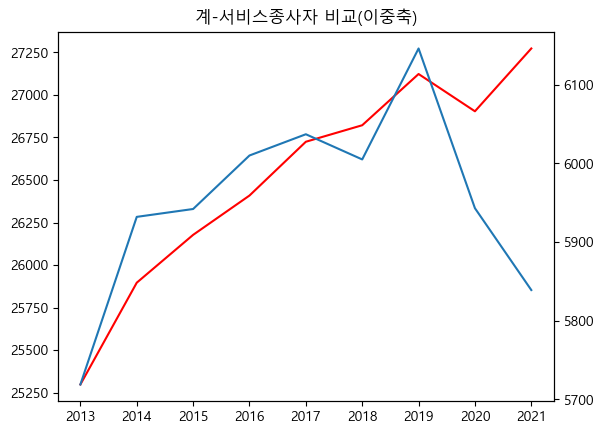

In [36]:

fig, ax1 = plt.subplots()
ax1.set_title('계-서비스종사자 비교(이중축)')
ax1.plot(data_total['연도별'],data_total["계"], color = "red")
ax2 = ax1.twinx()
ax2.plot(data_ser['연도별'],data_ser["서비스·판매 종사자"])
plt.show()
# color = 'tab:red'
# ax1.set_ylabel('계',color = color)
# ax1.plot(xrange, data_total, color = color)
# ax1.tick_params(axis='y',labelcolor = color)

# ax2 = ax1.twinx()

# color = 'tab:blue'
# ax2.set_ylabel('서비스종사자',color = color)
# ax2.plot(xrange, data_ser, color = color)
# ax2.tick_params(axis='y',labelcolor = color)

# fig.tight_layout()


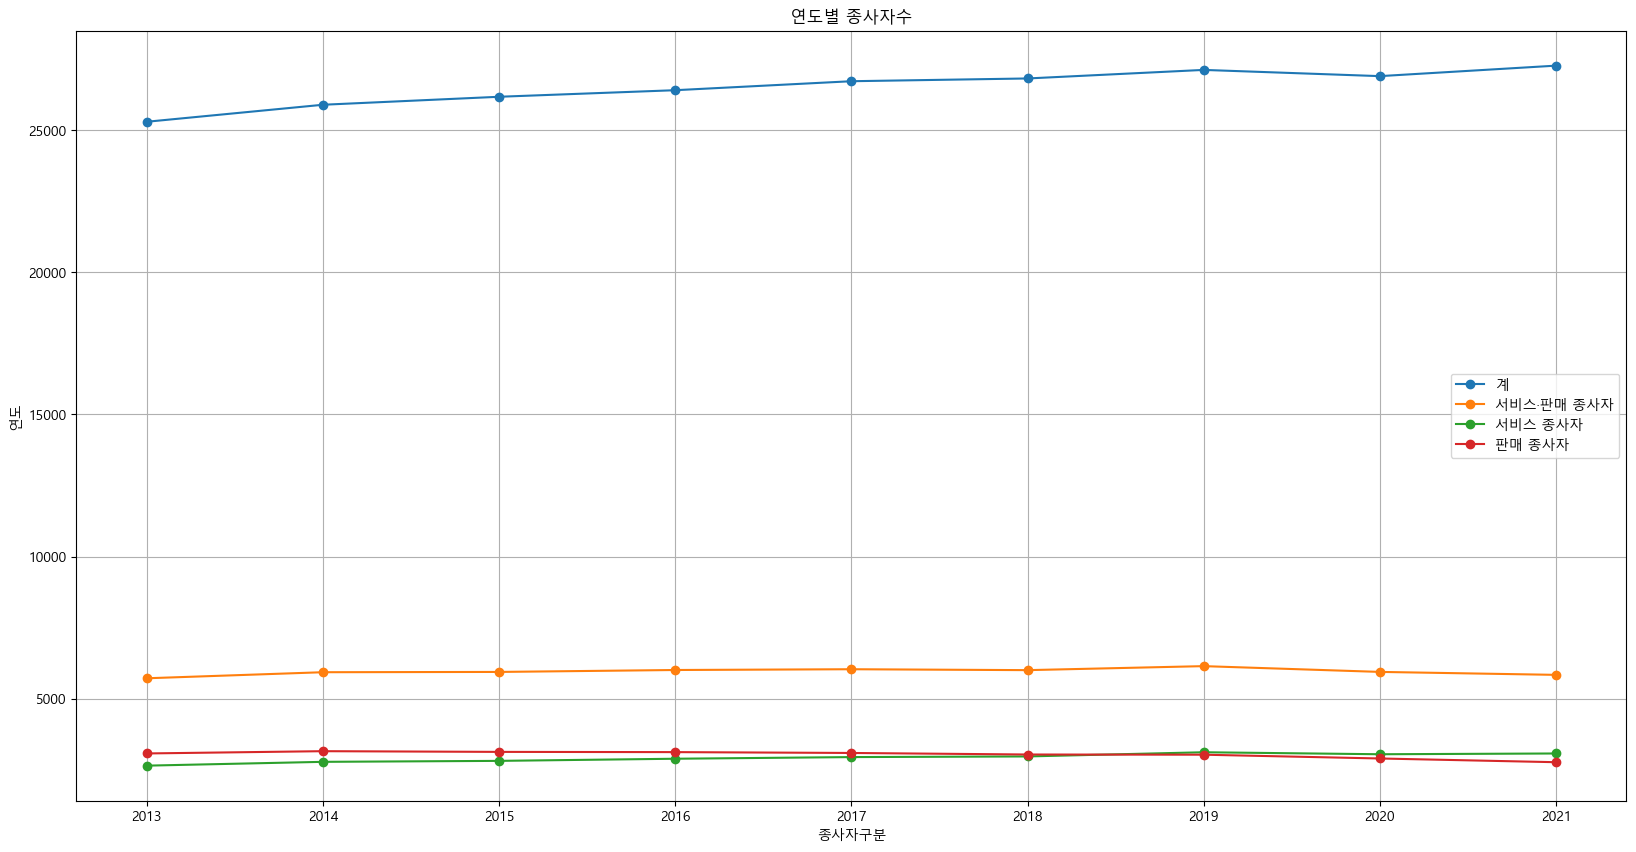

In [ ]:
data.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('종사자구분')
plt.ylabel('연도')
plt.title('연도별 종사자수')

plt.show()

